# Customer Behaviour Analysis

## I. Pendahuluan

Analisis Perilaku pelanggan adalah proses yang melibatkan pemeriksaan dan pemahaman dari interaksi dari pelanggan dengan bisnis, produk maupun layanan. Analisi ini dapat membantu suatu perusahaan atau pihak yang terkait dalam membuat keputusan yang tepat, baik untuk menyesuaikan strategi mereka hingga untuk meningkatkan pengalaman dari suatu customer tersebut. Dalam analisis ini mencangkup pengamatan kualitatif dan kuantitatif terhadap interaksi customer, segmentasi pelanggan ke dalam buyer personas dan penggunaan data yang nantinya digunakan untuk mengoptimalkan pemasaran dan mempersonalisasi pengalaman pelanggan.

## II. Tujuan

Analisis ini memiliki tujuan untuk mempermudah pelaku bisnis dalam mengambil keputusan dalam bisnis nya. Wawasan yang didapatkan dari analisis perilaku pelanggan ini dapat memungkinkan bisnis untuk mengambil keputusan atau tindakan yang tepat dan pada akhirnya hal ini akan mendorong pertumbuhan dan memaksimalkan kepuasan pelanggan. 

## III. Workflow Project

1. Data Collection : Tahap ini merupakan langkah awal dalam analisis data, di mana data dikumpulkan dari berbagai sumber. 

2. Exploratory Data Analysis (EDA) : Tahap ini bertujuan untuk memahami karakteristik data yang telah dikumpulkan.

3. Analis Data : Tahap ini dilakukan untuk menganalisis dan mengolah data.

4. Kesimpulan : Tahap terakhir adalah menarik kesimpulan dari hasil analisis data. Kesimpulan harus berdasarkan fakta dan data yang telah dianalisis.

## A. Data Collection

- **User_ID**: Tanda unik yang diberikan kepada setiap pelanggan.
- **Gender**: Jenis kelamin dari pelanggan, bisa berupa "Male" atau "Female".
- **Age**: Umur dari pelanggan.
- **Location**: Lokasi dari pelanggan, seperti kota atau wilayah.
- **Device_Type**: Jenis perangkat yang digunakan oleh pelanggan untuk mengakses platform, misalnya "Smartphone", "Laptop", atau "Desktop".
- **Product_Browsing_Time**: Jumlah waktu yang dihabiskan oleh pelanggan untuk menjelajahi produk dalam menit.
- **Total_Pages_Viewed**: Jumlah total halaman produk yang dilihat oleh pelanggan selama sesi browsing.
- **Items_Added_to_Cart**: Jumlah item yang ditambahkan oleh pelanggan ke dalam keranjang belanja selama sesi browsing.
- **Total_Purchases**: Jumlah total pembelian yang dilakukan oleh pelanggan.


### 1) Subset Data

In [1]:
# Subset Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Subset Data
df = pd.read_csv("https://raw.githubusercontent.com/FahdAby/3-Customer-Behaviour-Analysis/master/ecommerce_customer_data.csv")
df.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


### 2) Summary Statistics

In [3]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [4]:
# Statistika Deskriptif
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [5]:
# Summary untuk kolom kategorik
df.describe(include="object") 

,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


## B. Exploratory Data Analysis

### 1) Histogram distribusi kolom "Age"

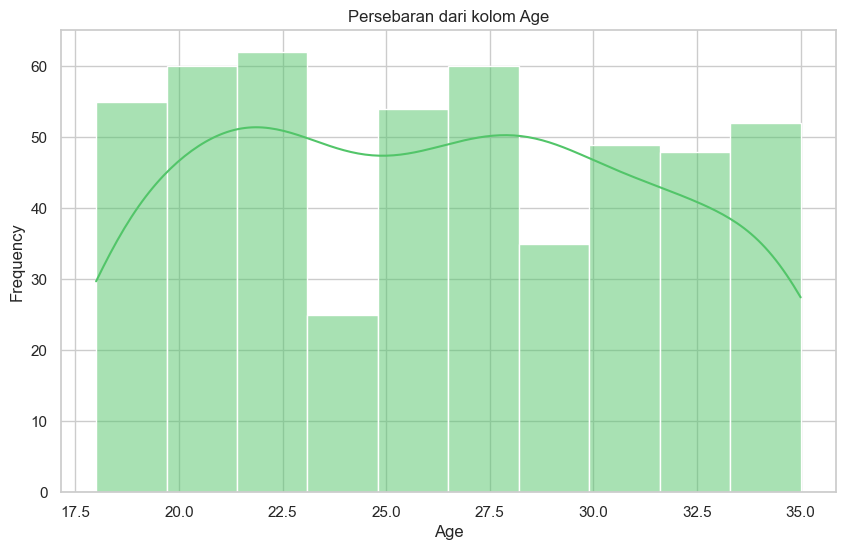

In [6]:
# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Mengatur tema warna
sns.set_palette(["#52c569"])

# Membuat histogram dengan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Persebaran dari kolom Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

__Interpretasi :__
Dari Histogram yang telah dibuat tersebut tidak memiliki pola bentuk tertentu atau persebaran dari umur bisa dibilang acak atau uniform. Distribusi dari data age tersebar secara merata di seluruh rentang nilainya tanpa adanya konssentrasi pada interval tertentu  

### 2) Barchart frekuensi kolom "Gender"

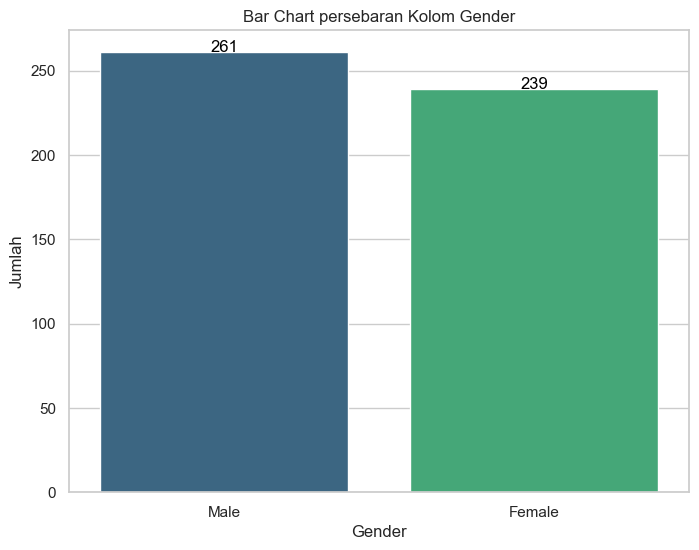

In [19]:
# Menghitung jumlah masing-masing gender
hitung_gender = df["Gender"].value_counts().reset_index()
hitung_gender.columns = ["Gender", "Jumlah"]

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(8, 6))
bar = sns.barplot(x=hitung_gender["Gender"], y=hitung_gender["Jumlah"]
            , hue=hitung_gender["Gender"], palette="viridis", legend=False)

# Menambahkan judul dan label sumbu
plt.title('Bar Chart persebaran Kolom Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Menambahkan label jumlah di atas tiap batang
for index, row in hitung_gender.iterrows():
    bar.text(index, row["Jumlah"] + 0.1, row["Jumlah"], color='black', ha="center")

# Menampilkan plot
plt.show()


## C. Analisis Data

### 1) Relasi antara 2 variabel dengan scatter plot

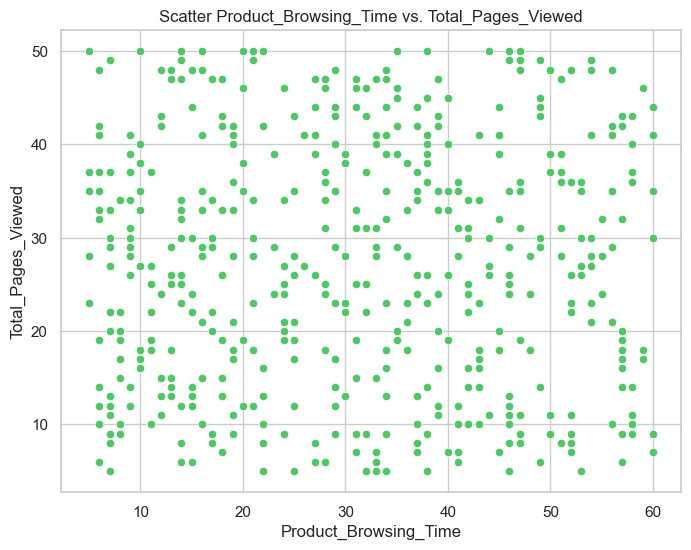

In [8]:
# Scatter plot Product_Browsing_Time vs Total_Pages_Viewed
# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Product_Browsing_Time", y="Total_Pages_Viewed", data=df, color=["#52c569"]
                , marker='o', legend=False )

# Menambahkan judul dan label sumbu
plt.title('Scatter Product_Browsing_Time vs. Total_Pages_Viewed')
plt.xlabel('Product_Browsing_Time')
plt.ylabel('Total_Pages_Viewed')

# Menampilkan plot
plt.show()

__Interpretasi :__
Dari Scatter diatas menunjukkan bahwa tidak adanya pola yang konsisten, tidak adanya hubungan yang kuat antara waktu yang dihabisan untuk menjelajahi produk dengan jumlah halaman yang dilihat. Hal ini menunjukkan bahwa pelanggan belum tentu menjelajahi labih banyak halaman jika mereka menghabiskan lebih banyak waktu di situs web, hal ini mungkin saja disebabkan karena berbagai faktor, seperti desain situs web atau yang lain.

### 2) Rata-rata Page Viewed berdasarkan gender

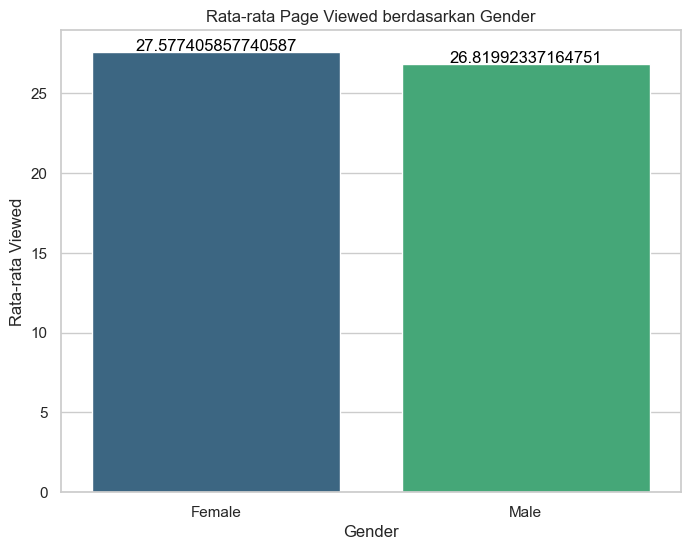

In [9]:
lihat_gender = df.groupby("Gender")["Total_Pages_Viewed"].mean().reset_index()
lihat_gender.columns = ["Gender", "Rata-rata Viewed"]

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(8, 6))
bar = sns.barplot(x=lihat_gender["Gender"], y=lihat_gender["Rata-rata Viewed"]
            , hue=lihat_gender["Gender"], palette="viridis", legend=False)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Page Viewed berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Viewed')

# Menambahkan label jumlah di atas tiap batang
for index, row in lihat_gender.iterrows():
    bar.text(index, row["Rata-rata Viewed"] + 0.1, row["Rata-rata Viewed"], color='black', ha="center")

# Menampilkan plot
plt.show()

__Interpretasi :__
Dari Visualisasi diatas didapatkan bahwa Female(perempuan) memilii rata-rata Total Page Viewed lebih tinggi daripada Male(laki-laki)

### 3) Rata-rata Page Viewed berdasarkan Devices

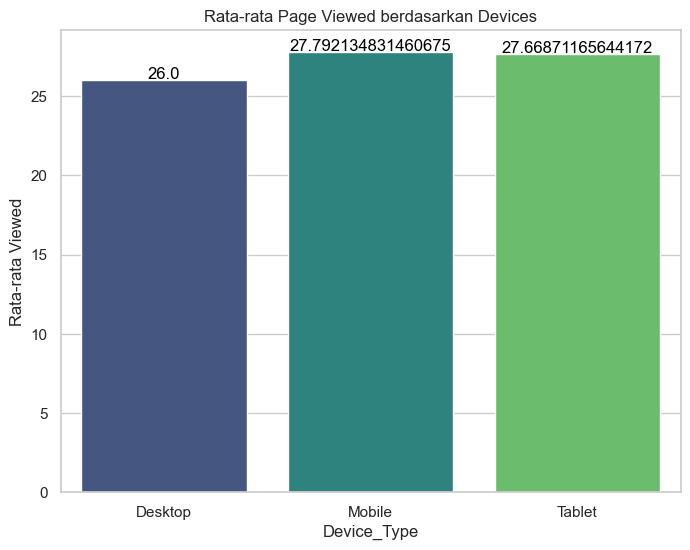

In [10]:
lihat_device = df.groupby("Device_Type")["Total_Pages_Viewed"].mean().reset_index()
lihat_device.columns = ["Device_Type", "Rata-rata Viewed"]

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(8, 6))
bar = sns.barplot(x=lihat_device["Device_Type"], y=lihat_device["Rata-rata Viewed"]
            , hue=lihat_device["Device_Type"], palette="viridis", legend=False)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Page Viewed berdasarkan Devices')
plt.xlabel('Device_Type')
plt.ylabel('Rata-rata Viewed')

# Menambahkan label jumlah di atas tiap batang
for index, row in lihat_device.iterrows():
    bar.text(index, row["Rata-rata Viewed"] + 0.1, row["Rata-rata Viewed"], color='black', ha="center")

# Menampilkan plot
plt.show()

__Interpretasi :__
Dari Visualisasi diatas didapatkan bahwa Device Mobile memiliki rata-rata total Page Viewed terbesar lalu diikuti dengan Tablet dan yang terakhir adalah dekstop.

### 4) Menghitung Nilai Tingkatan Hidup dan Visualisasinya

Dalam Proses Menghitung Nilai Tingkatan Hidup terdapat beberapa proses tahapan, penjelasan tahapan dijelaskan sebagai berikut :

1. Menghitung dan mencari kolom baru Nilai Tingkatan Hidup dengan cara mengalikan total pembelian dengan total halaman yang dilihat, kemudian dibagi dengan umur pelanggan. 

2. Mensegmentasi atau mengklasifikasikan Nilai Tingkatan Hidup menjadi 3 tingkatan, yaitu nilai 0-2.5 dalam tingkat rendah, nilai 2.5-5 dalam tingkat menengah dan 5 keatas dalam tingkat atas.

3. Setelah itu dalam setiap tingkatan akan dihitung berapa jumlahnya dan akan di visualisasikan dalam bentuk barchard.

In [11]:
# Menghitung Nilai Tingkatan Hidup
df["NTH"] = (df["Total_Purchases"] * df["Total_Pages_Viewed"]) / df["Age"]

# Segmentasi Nilai Tingkatan Hidup
df["Tingkat"] = pd.cut(df["NTH"], bins = [1, 2.5, 5, float('inf')],
                       labels = ["Rendah", "Menengah", "Atas"])

hitung_tingkat = df["Tingkat"].value_counts().reset_index()
hitung_tingkat.columns = ["Kelas", "Jumlah"]


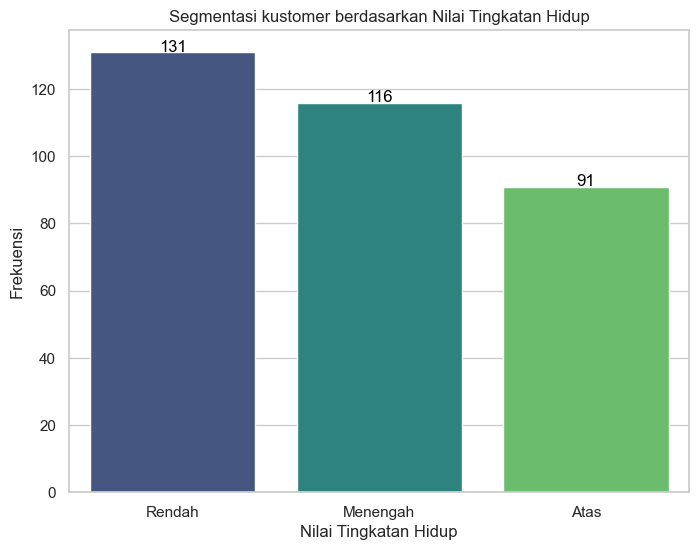

In [12]:
# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(8, 6))
bar = sns.barplot(x=hitung_tingkat["Kelas"], y=hitung_tingkat["Jumlah"]
            , hue=hitung_tingkat["Kelas"], palette="viridis", legend=False)

# Menambahkan judul dan label sumbu
plt.title('Segmentasi kustomer berdasarkan Nilai Tingkatan Hidup')
plt.xlabel('Nilai Tingkatan Hidup')
plt.ylabel('Frekuensi')

# Menambahkan label jumlah di atas tiap batang
for index, row in hitung_tingkat.iterrows():
    bar.text(index, row["Jumlah"] + 0.1, row["Jumlah"], color='black', ha="center")

# Menampilkan plot
plt.show()

__Interpretasi :__
Dari Visualisasi diatas didapatkan bahwa Kelas/segmen rendah memiliki frekuensi terbesar lalu diikuti dengan Kelas/segmen menengah dan yang terakhir adalah Kelas/segmen atas.

### 5) Analisis Funnel

In [13]:
# Analisis Funnel
data_funnel = df[["Product_Browsing_Time", "Items_Added_to_Cart", "Total_Purchases"]]
data_funnel = data_funnel.groupby(["Product_Browsing_Time", "Items_Added_to_Cart"]).sum().reset_index()

# Membuat Funnel Chart
fig = px.funnel(data_funnel, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversi Funnel',
                color_discrete_sequence=["#52c569"])
fig.show()


__Interpretasi :__
Dalam Grafik tersebut, sumbu X menunjukkan waktu yang dihabiskan pelanggan untuk menelusuri produk di platform e-commerce. Sumbu y mewakili jumlah item yang ditambahkan ke keranjang belanja oleh pelanggan selama sesi penjelajahan mereka.

### 6) Menghitung Churn Rate

__Churn Rate__ sendiri dapat memberikan wawasan tentang seberapa baik dan efektif perusahaan tersebut dalam mempertahankan customer dan menjaga loyalitas dari pelanggan tersebut. Semakin besar nilai dari Churn Rate maka tantangan dari perusahaan tersebut dalam mempertahankan pelanggan dan menjaga loyalitas dari customer semakin besar/sulit.

In [18]:
# Menghitung Tingkat Churn
df["Churn"] = df["Total_Purchases"] == 0

tingkat_churn = df["Churn"].mean()
tingkat_churn

0.198

__Interpretasi :__ Dari hasil perhitungan tersebut didapatkan bahwa nilai dari tingkat churn adalah sebesar 0.198, ini berarti sekitar 19.8% dari total customer telah berhenti menggunakan layanan atau produk dalam periode waktu tersebut.

## Kesimpulan

Berdasarkan informasi yang diberikan, kesimpulan proyek analisis data dapat dirangkum sebagai berikut:

1. Tidak ada hubungan atau relasi yang signifikan antara total halaman yang dilihat dan waktu penjelajahan produk. Meskipun kedua variabel tersebut penting dalam memahami perilaku pelanggan, tidak ada korelasi yang jelas antara keduanya, yang menunjukkan bahwa jumlah halaman yang dilihat tidak selalu berdampak pada waktu yang dihabiskan untuk menjelajahi produk.

2. Wanita memiliki rata-rata total halaman yang dilihat lebih tinggi daripada pria. Ini menunjukkan bahwa wanita mungkin lebih aktif dalam menjelajahi atau menggunakan produk atau layanan perusahaan, dan dapat menjadi wawasan penting dalam pengembangan strategi pemasaran atau segmentasi pelanggan.

3. Device mobile merupakan perangkat yang paling banyak digunakan oleh pelanggan, dengan rata-rata total halaman yang dilihat terbesar. Informasi ini dapat membantu organisasi dalam mengoptimalkan pengalaman pengguna untuk perangkat mobile dan meningkatkan fokus pada pengembangan aplikasi atau situs web yang responsif terhadap perangkat mobile.

4. Kelas atau segmen pelanggan berdasarkan nilai tingkatan hidup menunjukkan bahwa kelas atau segmen rendah memiliki jumlah pelanggan terbesar dibandingkan dengan yang lain. Hal ini bisa menjadi informasi berharga untuk menyusun strategi pemasaran atau penargetan yang lebih efektif terhadap segmen tersebut.

5. Tingkat churn sebesar 0.198 menunjukkan bahwa sekitar 19.8% dari total pelanggan telah berhenti menggunakan layanan atau produk dalam periode waktu tertentu. Hal ini mengindikasikan adanya tantangan dalam mempertahankan basis pelanggan dan menekankan pentingnya untuk mengembangkan strategi retensi pelanggan yang efektif.

Kesimpulan ini memberikan gambaran yang komprehensif tentang perilaku pelanggan dan faktor-faktor yang memengaruhinya, serta dapat menjadi dasar untuk pengembangan strategi lebih lanjut dalam meningkatkan pengalaman pelanggan dan pertumbuhan bisnis.